# Analyzing the quality

After we analyzed the runtime, let us next analyze the quality.
We already know that density is important, so let use skip the tuning steps we made in the previous notebook.

In [8]:
# import and setup seaborn
import seaborn as sns
import matplotlib.pyplot as plt  # seaborn works on matplotlib

sns.set_theme()  # making the plot pretty by default

# import size parameters for plots to look good in your paper
from _utils import PLOT_DOC_FULL_WIDTH, PLOT_DOC_HALF_WIDTH

## Quickly load the data

In [9]:
import pandas as pd

results = pd.read_json("./06_simplified_results.json.zip")
# derived values for analyzis
best_coloring = results.groupby("instance")[["colors"]].min()
results = pd.merge(
    left=results, right=best_coloring, on="instance", suffixes=("", "_best")
)
results["above_best (%)"] = (results["colors"] / results["colors_best"] - 1) * 100
# name the alg for the legend.
results["alg"] = results.apply(
    (lambda row: row["strategy"] + ("-interchange" if row["interchange"] else "")),
    axis=1,
)

## Plot the data

Let us just use the last plot of the runtime analyzis but with the quality.
We notice a much higher deviation which makes it difficult to distinguish the lines.

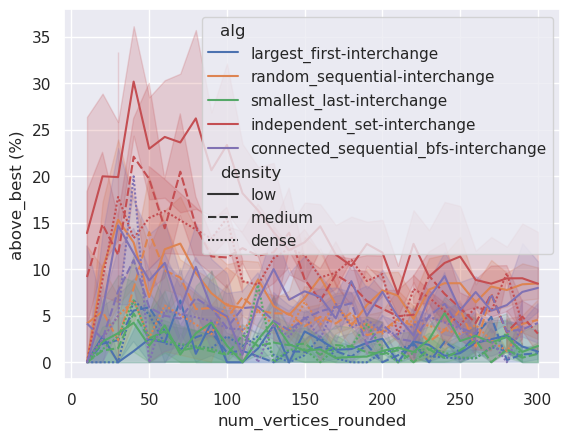

In [11]:
t = results  # shorter handle


def edge_density(num_vertices, num_edges):
    max_edges = (num_vertices * (num_vertices - 1)) / 2
    density = num_edges / max_edges
    if density > 0.8:
        return "dense"
    if density > 0.5:
        return "medium"
    return "low"


best_five = t.nsmallest(5, columns="above_best (%)")["alg"].to_list()
t["num_vertices_rounded"] = t["num_vertices"].apply(lambda x: (10 * round(x / 10)))
t["density"] = t.apply(
    (lambda row: edge_density(row["num_vertices"], row["num_edges"])), axis=1
)
sns.lineplot(
    t[t["alg"].isin(best_five)],
    x="num_vertices_rounded",
    y="above_best (%)",
    hue="alg",
    style="density",
)
plt.show()

Increasing the rounding interval and removing the errorbars helps a lot. We see that dense graphs usually lead to (relatively) better results.
For the best algorithm, the deviation is still relatively low.

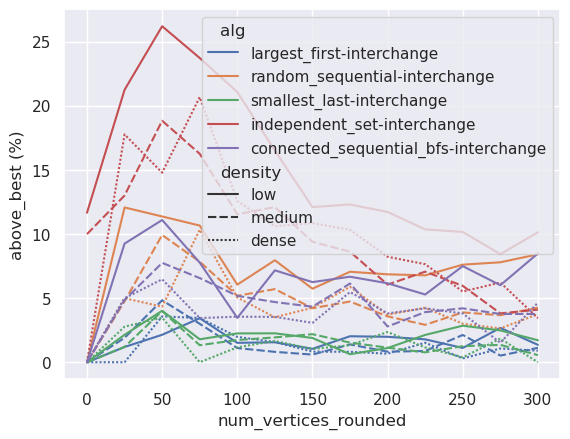

In [15]:
t["num_vertices_rounded"] = t["num_vertices"].apply(lambda x: (25 * round(x / 25)))
sns.lineplot(
    t[t["alg"].isin(best_five)],
    x="num_vertices_rounded",
    y="above_best (%)",
    hue="alg",
    style="density",
    errorbar=None,
)
plt.show()